In [1]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from keras.utils import to_categorical
from tensorflow.keras.initializers import GlorotUniform
import matplotlib.pyplot as plt

# Load data
p_data = np.load("pituitary_final.npy")
n_data = np.load("no_tumor_final.npy")
g_data = np.load("glioma_final.npy")
m_data = np.load("meningioma_final.npy")

# Set labels
p_labels = np.ones(p_data.shape[0], dtype=np.int32)*0
n_labels = np.ones(n_data.shape[0], dtype=np.int32)*1
g_labels = np.ones(g_data.shape[0], dtype=np.int32)*2
m_labels = np.ones(m_data.shape[0], dtype=np.int32)*3

all_data = np.concatenate([p_data, n_data, g_data, m_data], axis=0)
all_labels = np.concatenate([p_labels, n_labels, g_labels, m_labels])

# One-hot encode labels
one_hot_label = to_categorical(all_labels)

# Initialize k-fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize list to store test accuracies
test_accs = []

# # Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(4, (2, 2), activation='relu', kernel_initializer=GlorotUniform(),
                           input_shape=(64, 64, 4)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
    tf.keras.layers.Dense(4, activation='softmax', kernel_initializer=GlorotUniform())
])

# Train and evaluate model using cross-validation
for train_index, test_index in skf.split(all_data, all_labels):
    train_data, test_data = all_data[train_index], all_data[test_index]
    train_labels, test_labels = one_hot_label[train_index], one_hot_label[test_index]
    
    # Compile the model
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_data, train_labels, batch_size=32, epochs=20)

    
    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=1)
    print('Test accuracy:', test_acc)

    # Append test accuracy to list
    test_accs.append(test_acc)

    
    # # Plot accuracy
    # plt.plot(history.history['accuracy'])
    # plt.plot(history.history['val_accuracy'])
    # plt.title('Model Accuracy')
    # plt.ylabel('Accuracy')
    # plt.xlabel('Epoch')
    # plt.legend(['Train', 'Validation'], loc='upper left')
    # plt.show()

    # # Plot loss
    # plt.plot(history.history['loss'])
    # plt.plot(history.history['val_loss'])
    # plt.title('Model Loss')
    # plt.ylabel('Loss')
    # plt.xlabel('Epoch')
    # plt.legend(['Train', 'Validation'], loc='upper left')
    # plt.show()

Epoch 1/20
92/92 [==============================] - 15s 144ms/step - loss: 1.7754 - accuracy: 0.2840
Epoch 2/20
92/92 [==============================] - 9s 101ms/step - loss: 1.3329 - accuracy: 0.3558
Epoch 3/20
92/92 [==============================] - 6s 68ms/step - loss: 1.2899 - accuracy: 0.4093
Epoch 4/20
92/92 [==============================] - 7s 82ms/step - loss: 1.1946 - accuracy: 0.5284
Epoch 5/20
92/92 [==============================] - 6s 68ms/step - loss: 1.1128 - accuracy: 0.5451
Epoch 6/20
92/92 [==============================] - 7s 81ms/step - loss: 1.0507 - accuracy: 0.5758
Epoch 7/20
92/92 [==============================] - 6s 71ms/step - loss: 0.9867 - accuracy: 0.6210
Epoch 8/20
92/92 [==============================] - 7s 81ms/step - loss: 0.9337 - accuracy: 0.6449
Epoch 9/20
92/92 [==============================] - 6s 66ms/step - loss: 0.9050 - accuracy: 0.6483
Epoch 10/20
92/92 [==============================] - 7s 79ms/step - loss: 0.8577 - accuracy: 0.6769
Epoch 

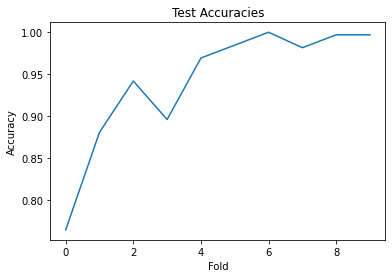

In [2]:
# Plot test accuracies
plt.plot(test_accs)
plt.title('Test Accuracies')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()